# Data science capstone project

# 1.Introduction:
When there is an accident happening on the road, a terrible traffic jam may be caused, which influences other people’s plans. It would be great if there is something in place that could warn people, given the weather and the road conditions about the possibility of people getting into a car accident and how severe it would be. So people would drive more carefully or even change their travels if they are able to. In this project, we will be working on a case study which is to predict the severity of an accident. We will try to use the accident data in Seattle City that include many influence factors of collisions for the prediction of the severity of an accident.

1.1.Problems:
To improve the safely driving level of all the car users in Seattle City, we will try to find the answers to the following problems:
Q1) What are the main factors that influence the severity of an accident? How to list and visualize them?
Q2) How to use basic machine learning technologies to build a model to predict the severity of an accident?

# 2.Data Information
All collisions are provided by SPD and recorded by Traffic Records. This includes all types of collisions happening in Seattle City, which was updated weekly. Collisions will display at the intersection or mid-block of a segment. 
Timeframe: 2004 to Present. 
Contact Person: SDOT GIS Analyst 
Contact Organization: SDOT Traffic Management Division, Traffic Records Group 
Contact email: DOT_IT_GIS@seattle.gov 
2.1.Data discussion:
We have the following discussion about the data:
1.The dataset includes 37 attributes. Some of them are much related to the severity of an accident, such as weather condition, car speeding and light conditions. Note that not all the attributes are useful.
2.There are many empty inputs in the accident data. For instance, the column “ROADCOND” includes 5012 empty inputs. There also exist both numerical and categorical types of data, which leads to the utilization of feature engineering.
3.The dataset has labels so that supervised machine learning technologies are suitable to predict the severity of an accident; nevertheless, the dataset is not label balanced. We should balance the data firstly before we create a model.

# 3.Methodology
In this part, we mainly utilize logistic regression to classify the data for two groups according to different severity levels. The reason why we choose this method is that logistic regression has the advantage to classify data, especially for data belonging to two categories. Compared with SVM, logistic regression is much faster. 

Firstly, let us do some Exploratory Data Analysis. The part of data can be shown as follows:

In [22]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
!wget -O data.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-22 21:50:14--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘data.csv’

100%[======================================>] 73,917,638  29.8MB/s   in 2.4s   

2020-08-22 21:50:17 (29.8 MB/s) - ‘data.csv’ saved [73917638/73917638]



In [23]:
df = pd.read_csv("data.csv")
# take a look at the dataset
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [24]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [25]:
#all of attributes and corresponding data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

From below data result, we can see some null results

In [26]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Let us also do some figures to show more details.

Text(0.5, 0, 'Type of address')

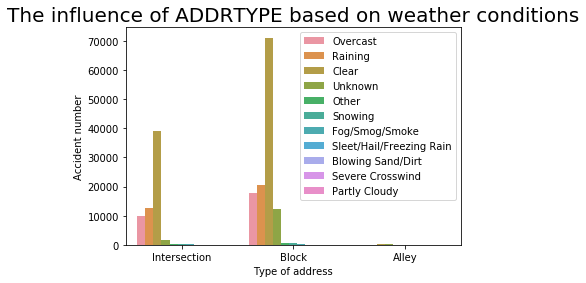

In [77]:
import seaborn as sns

plt.figure()
sns.countplot(x="ADDRTYPE", hue="WEATHER", data=df )
plt.title("The influence of ADDRTYPE based on weather conditions", fontsize=20)
plt.legend(loc="upper right")
plt.ylabel("Accident number")
plt.xlabel("Type of address")

(array([0]), <a list of 1 Text xticklabel objects>)

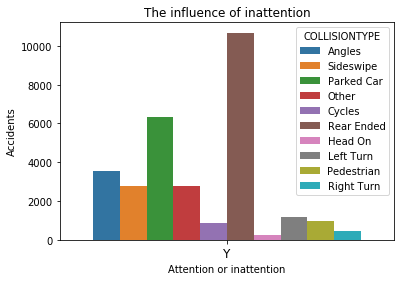

In [72]:
plt.figure()
sns.countplot(x="INATTENTIONIND", hue="COLLISIONTYPE", data=df)
plt.title("The influence of inattention")
plt.xlabel("Attention or inattention")
plt.ylabel("Accidents")
df["JUNCTIONTYPE"].unique()

plt.xticks(fontsize=12)

(array([0]), <a list of 1 Text xticklabel objects>)

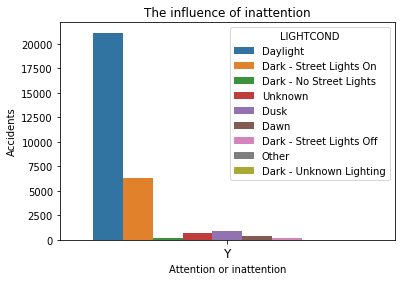

In [76]:
plt.figure()
sns.countplot(x="INATTENTIONIND", hue="LIGHTCOND", data=df)
plt.title("The influence of inattention")
plt.xlabel("Attention or inattention")
plt.ylabel("Accidents")
df["JUNCTIONTYPE"].unique()

plt.xticks(fontsize=12)

Let us generate the data we will use in the model

In [28]:
new = df[['X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT','PEDCOUNT','PEDCYLCOUNT', 'WEATHER', 'ROADCOND',   'LIGHTCOND', 'SPEEDING','PEDROWNOTGRNT','SEVERITYCODE']]
new.head()

,X,Y,ADDRTYPE,PERSONCOUNT,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,PEDROWNOTGRNT,SEVERITYCODE
0,-122.323148,47.703140,Intersection,2,2,0,0,Overcast,Wet,Daylight,NaN,NaN,2
1,-122.347294,47.647172,Block,2,2,0,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,1
2,-122.334540,47.607871,Block,4,3,0,0,Overcast,Dry,Daylight,NaN,NaN,1
3,-122.334803,47.604803,Block,3,3,0,0,Clear,Dry,Daylight,NaN,NaN,1
4,-122.306426,47.545739,Intersection,2,2,0,0,Raining,Wet,Daylight,NaN,NaN,2


In [29]:
new['SPEEDING'].replace(np.nan, 'NO', inplace = True)
new['PEDROWNOTGRNT'].replace(np.nan, 'NO', inplace = True)
new.head(5)
new['SPEEDING'].unique()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array(['NO', 'Y'], dtype=object)

In [30]:
#r emove rows containing NaN
new = new.dropna(axis=0, how='any')
new.head(20)

,X,Y,ADDRTYPE,PERSONCOUNT,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,PEDROWNOTGRNT,SEVERITYCODE
0,-122.323148,47.703140,Intersection,2,2,0,0,Overcast,Wet,Daylight,NO,NO,2
1,-122.347294,47.647172,Block,2,2,0,0,Raining,Wet,Dark - Street Lights On,NO,NO,1
2,-122.334540,47.607871,Block,4,3,0,0,Overcast,Dry,Daylight,NO,NO,1
3,-122.334803,47.604803,Block,3,3,0,0,Clear,Dry,Daylight,NO,NO,1
4,-122.306426,47.545739,Intersection,2,2,0,0,Raining,Wet,Daylight,NO,NO,2
5,-122.387598,47.690575,Intersection,2,2,0,0,Clear,Dry,Daylight,NO,NO,1
6,-122.338485,47.618534,Intersection,2,2,0,0,Raining,Wet,Daylight,NO,NO,1
7,-122.320780,47.614076,Intersection,3,1,0,1,Clear,Dry,Daylight,NO,NO,2
8,-122.335930,47.611904,Block,2,2,0,0,Clear,Dry,Daylight,NO,NO,1
9,-122.384700,47.528475,Intersection,2,2,0,0,Clear,Dry,Daylight,NO,NO,2


Use 'get_dummies' to generate numerical features

In [31]:
dummy_variable_1 = pd.get_dummies(new["ADDRTYPE"])

dummy_variable_2 = pd.get_dummies(new["WEATHER"])

dummy_variable_3 = pd.get_dummies(new["ROADCOND"])

dummy_variable_4 = pd.get_dummies(new["LIGHTCOND"])

dummy_variable_5 = pd.get_dummies(new["SPEEDING"])

dummy_variable_6 = pd.get_dummies(new["PEDROWNOTGRNT"])

In [32]:
# merge data frame "df" and "dummy_variable_1" 
new_final = pd.concat([new['X'],new['Y'],new['PERSONCOUNT'], new['VEHCOUNT'],new['PEDCOUNT'], new['PEDCYLCOUNT'],dummy_variable_1, dummy_variable_2, dummy_variable_3, dummy_variable_4, dummy_variable_5, dummy_variable_6, new['SEVERITYCODE']], axis=1)
# new_final=new
new_final.head()

,X,Y,PERSONCOUNT,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT,Block,Intersection,Blowing Sand/Dirt,Clear,...,Dawn,Daylight,Dusk,Other,Unknown,NO,Y,NO,Y,SEVERITYCODE
0,-122.323148,47.703140,2,2,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,2
1,-122.347294,47.647172,2,2,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,-122.334540,47.607871,4,3,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
3,-122.334803,47.604803,3,3,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1
4,-122.306426,47.545739,2,2,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,2


In [33]:
new_final.corr()

,X,Y,PERSONCOUNT,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT,Block,Intersection,Blowing Sand/Dirt,Clear,...,Dawn,Daylight,Dusk,Other,Unknown,NO,Y,NO,Y,SEVERITYCODE
X,1.000000,-0.160175,0.012762,-0.016030,0.011408,-0.001923,-0.005191,0.005191,-0.001077,0.004332,...,-0.000171,0.026404,0.004632,-0.002570,-0.015511,0.008365,-0.008365,-0.008424,0.008424,0.010230
Y,-0.160175,1.000000,-0.014068,0.020603,0.010422,0.026657,-0.034169,0.034169,0.000967,-0.012376,...,-0.016180,-0.004394,0.008580,-0.001535,0.029042,0.026947,-0.026947,-0.022242,0.022242,0.018436
PERSONCOUNT,0.012762,-0.014068,1.000000,0.395165,-0.026981,-0.042459,-0.062338,0.062338,-0.002189,0.032068,...,-0.021106,0.038246,0.008416,-0.007258,-0.083733,0.001663,-0.001663,0.030597,-0.030597,0.127388
VEHCOUNT,-0.016030,0.020603,0.395165,1.000000,-0.321520,-0.311260,0.096171,-0.096171,0.001370,0.011242,...,-0.016221,0.032033,-0.001816,-0.000017,0.005125,0.040662,-0.040662,0.280795,-0.280795,-0.085234
PEDCOUNT,0.011408,0.010422,-0.026981,-0.321520,1.000000,-0.018442,-0.145828,0.145828,-0.001485,-0.003579,...,0.010569,-0.009415,0.004640,-0.001094,-0.039268,0.033374,-0.033374,-0.495497,0.495497,0.248415
PEDCYLCOUNT,-0.001923,0.026657,-0.042459,-0.311260,-0.018442,1.000000,-0.084369,0.084369,-0.000890,0.046299,...,0.010567,0.046064,0.007027,-0.003567,-0.034947,0.020619,-0.020619,-0.323449,0.323449,0.216448
Block,-0.005191,-0.034169,-0.062338,0.096171,-0.145828,-0.084369,1.000000,-1.000000,0.004770,-0.035650,...,-0.006586,-0.075881,-0.008744,0.009836,0.138005,-0.056881,0.056881,0.157405,-0.157405,-0.200647
Intersection,0.005191,0.034169,0.062338,-0.096171,0.145828,0.084369,-1.000000,1.000000,-0.004770,0.035650,...,0.006586,0.075881,0.008744,-0.009836,-0.138005,0.056881,-0.056881,-0.157405,0.157405,0.200647
Blowing Sand/Dirt,-0.001077,0.000967,-0.002189,0.001370,-0.001485,-0.000890,0.004770,-0.004770,1.000000,-0.019608,...,0.003962,-0.004248,0.000892,-0.000521,0.003580,-0.001072,0.001072,-0.001624,0.001624,-0.001377
Clear,0.004332,-0.012376,0.032068,0.011242,-0.003579,0.046299,-0.035650,0.035650,-0.019608,1.000000,...,-0.041034,0.218795,-0.014883,-0.015597,-0.254985,0.063401,-0.063401,-0.004243,0.004243,0.052076


In [13]:
new_final.corr()

,X,Y,PERSONCOUNT,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT,Block,Intersection,Blowing Sand/Dirt,Clear,...,Dawn,Daylight,Dusk,Other,Unknown,NO,Y,NO,Y,SEVERITYCODE
X,1.000000,-0.160175,0.012762,-0.016030,0.011408,-0.001923,-0.005191,0.005191,-0.001077,0.004332,...,-0.000171,0.026404,0.004632,-0.002570,-0.015511,0.008365,-0.008365,-0.008424,0.008424,0.010230
Y,-0.160175,1.000000,-0.014068,0.020603,0.010422,0.026657,-0.034169,0.034169,0.000967,-0.012376,...,-0.016180,-0.004394,0.008580,-0.001535,0.029042,0.026947,-0.026947,-0.022242,0.022242,0.018436
PERSONCOUNT,0.012762,-0.014068,1.000000,0.395165,-0.026981,-0.042459,-0.062338,0.062338,-0.002189,0.032068,...,-0.021106,0.038246,0.008416,-0.007258,-0.083733,0.001663,-0.001663,0.030597,-0.030597,0.127388
VEHCOUNT,-0.016030,0.020603,0.395165,1.000000,-0.321520,-0.311260,0.096171,-0.096171,0.001370,0.011242,...,-0.016221,0.032033,-0.001816,-0.000017,0.005125,0.040662,-0.040662,0.280795,-0.280795,-0.085234
PEDCOUNT,0.011408,0.010422,-0.026981,-0.321520,1.000000,-0.018442,-0.145828,0.145828,-0.001485,-0.003579,...,0.010569,-0.009415,0.004640,-0.001094,-0.039268,0.033374,-0.033374,-0.495497,0.495497,0.248415
PEDCYLCOUNT,-0.001923,0.026657,-0.042459,-0.311260,-0.018442,1.000000,-0.084369,0.084369,-0.000890,0.046299,...,0.010567,0.046064,0.007027,-0.003567,-0.034947,0.020619,-0.020619,-0.323449,0.323449,0.216448
Block,-0.005191,-0.034169,-0.062338,0.096171,-0.145828,-0.084369,1.000000,-1.000000,0.004770,-0.035650,...,-0.006586,-0.075881,-0.008744,0.009836,0.138005,-0.056881,0.056881,0.157405,-0.157405,-0.200647
Intersection,0.005191,0.034169,0.062338,-0.096171,0.145828,0.084369,-1.000000,1.000000,-0.004770,0.035650,...,0.006586,0.075881,0.008744,-0.009836,-0.138005,0.056881,-0.056881,-0.157405,0.157405,0.200647
Blowing Sand/Dirt,-0.001077,0.000967,-0.002189,0.001370,-0.001485,-0.000890,0.004770,-0.004770,1.000000,-0.019608,...,0.003962,-0.004248,0.000892,-0.000521,0.003580,-0.001072,0.001072,-0.001624,0.001624,-0.001377
Clear,0.004332,-0.012376,0.032068,0.011242,-0.003579,0.046299,-0.035650,0.035650,-0.019608,1.000000,...,-0.041034,0.218795,-0.014883,-0.015597,-0.254985,0.063401,-0.063401,-0.004243,0.004243,0.052076


Let's build the model and analyse the data

In [56]:
# from imblearn.over_sampling import RandomOverSampler

# from imblearn.under_sampling import RandomUnderSampler

# rus=RandomUnderSampler(random_state=0,replacement=True)

X = np.asarray(new_final.iloc[:,1:-5])
y = np.asarray(new_final['SEVERITYCODE'])

# X_r, y_r = rus.fit_sample(X, y)

Do the data preprocessing

In [57]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.48708375, -0.34450791,  0.04730059, -0.19177595, -0.17372292,
        -1.38442015,  1.38442015, -0.0163136 , -1.20194553, -0.05487944,
        -0.06458456,  2.40719269, -0.00521057, -0.45846688, -0.01141637,
        -0.02466807, -0.06960655, -0.28512025, -1.39868561, -0.0800971 ,
        -0.01696659, -0.02510498, -0.01849859, -0.07329173, -0.02354043,
        -0.28455206,  1.73287255, -0.08908294, -0.07909538, -0.58745177,
        -0.00772865, -0.11543987,  0.78886139, -0.1797306 , -0.03196648,
        -0.2688693 ],
       [ 0.49147384, -0.34450791,  0.04730059, -0.19177595, -0.17372292,
         0.72232407, -0.72232407, -0.0163136 , -1.20194553, -0.05487944,
        -0.06458456, -0.41542167, -0.00521057,  2.18118265, -0.01141637,
        -0.02466807, -0.06960655, -0.28512025, -1.39868561, -0.0800971 ,
        -0.01696659, -0.02510498, -0.01849859, -0.07329173, -0.02354043,
        -0.28455206,  1.73287255, -0.08908294, -0.07909538,  1.7022674 ,
        -0.00772865, -0.11543

## 1. Let us use logistic regression to build the model

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147333, 36) (147333,)
Test set: (36834, 36) (36834,)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Result analysis

In [60]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 2])

In [63]:
from sklearn.metrics import f1_score
yhat = LR.predict(X_test)
yhat
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7494434489873486

## 2. Let us use decision tree to build the model

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=2)
y_trainset


array([1, 1, 1, ..., 1, 2, 2])

In [65]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Let's make some predictions

In [67]:
PreTree = Tree.predict(X_testset)

In [68]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, PreTree))

DecisionTrees's Accuracy:  0.7483846446218168


## To summarize, we can find the results from logistic regression and decision tree are very close and enough high, which proves the efficiency of the suggested model.